In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm

gold = 8.*np.array([1,1/((1+np.sqrt(5))/2)])

# This function makes the plots look prettier on GitHub. 
### to do: figure out how to make this automatic.

def fix_boxplot(parts):
    for m in parts['fliers']:
        m.set_markersize(12)
        m.set_markeredgewidth(1)
    for b in parts['boxes']:
        b.set_linewidth(2)
    for w in parts['whiskers']:
        w.set_linewidth(2)
    for c in parts['caps']:
        c.set_linewidth(2)
    for m in parts['medians']:
        m.set_linewidth(2)
    for m in parts['means']:
        m.set_linewidth(2)
        m.set_color('g')
        m.set_markerfacecolor('g')

# This function creates the stem and leaf plot
def stem(data,leaf_dig=1):
    sorted_data = data.copy()
    sorted_data.sort()
    stem = (sorted_data // (10**leaf_dig)).astype(int)
    if leaf_dig>0:
        leaf = (sorted_data % (10**leaf_dig)).astype(int)
    else:
        leaf = (sorted_data % (10**leaf_dig) * (10**(1-leaf_dig))).astype(int)
    current_stem = -1
    for s,l in zip(stem,leaf):
        if s != current_stem:
            current_stem = s
            print("\n{0:4d} | ".format(s),end='')
        print("{0} ".format(l),end='')

# Problem 3.3

This problem is a combination of 3.1 and 3.2, but requires me to do more of the work.

Again, the data values have been changed to my own.

In [2]:
distance = np.round(np.random.normal(150.,0.5,size=50),1)
distance

array([ 149.1,  149.1,  150.1,  149.6,  149.9,  150.5,  149.9,  149.7,
        149.9,  150.4,  150.2,  150.4,  149.9,  149.6,  150.2,  149.3,
        150.6,  150.2,  150.4,  149.8,  150.5,  150.2,  150.4,  150.6,
        150.6,  150.5,  149.2,  149.3,  150.3,  150.6,  149.9,  149.5,
        149.2,  150.5,  149.1,  150. ,  150.2,  149.7,  150.4,  150. ,
        150.2,  149.7,  149.8,  148.6,  150.4,  150.9,  149.8,  149.3,
        150.1,  150.3])

### Part A

Stem and leaf. Using the first decimal place as the leaf (leaf_dig = 0)

In [3]:
stem(distance,0)


 148 | 5 
 149 | 0 0 0 1 1 3 3 3 5 5 5 6 6 6 8 8 8 9 9 9 9 9 
 150 | 0 0 0 0 1 1 1 1 1 1 3 3 4 4 4 4 4 4 5 5 5 5 5 5 5 5 9 

### Part B

Quartiles.

In [4]:
print("Meidan: {0}".format(np.percentile(distance,50)))
print("    Q1: {0}".format(np.percentile(distance,25)))
print("    Q3: {0}".format(np.percentile(distance,75)))

Meidan: 150.05
    Q1: 149.7
    Q3: 150.4


### Part C
Boxplot.

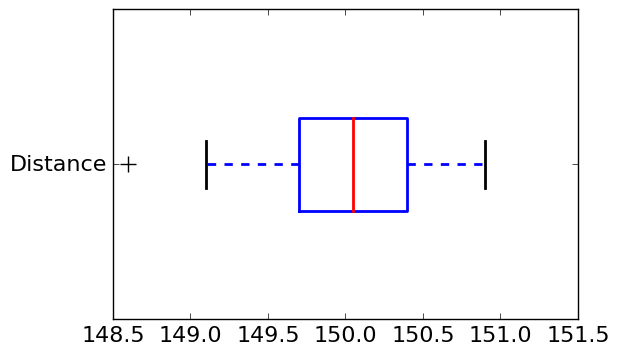

In [5]:
parts = plt.boxplot(distance,vert=False,labels=['Distance'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axis([148.5,151.5,0.75,1.25])
fix_boxplot(parts)

### Part D
Frequency Table.

In [6]:
boundaries = np.array([148.0,149.0,149.4,149.6,149.8,150.0,150.2,150.4,150.6,151.0,152.])
frequency = np.array([sum((distance>boundaries[i]) & (distance<=boundaries[i+1])) for i in range(len(boundaries)-1)])
print("    Boundaries\t    Frequency")
print("-"*30)
for i in range(len(boundaries)-1):
    print("{0:.1f} < x <= {1:.1f}\t{2}".format(boundaries[i],boundaries[i+1],frequency[i]))

    Boundaries	    Frequency
------------------------------
148.0 < x <= 149.0	1
149.0 < x <= 149.4	8
149.4 < x <= 149.6	3
149.6 < x <= 149.8	6
149.8 < x <= 150.0	7
150.0 < x <= 150.2	8
150.2 < x <= 150.4	8
150.4 < x <= 150.6	8
150.6 < x <= 151.0	1
151.0 < x <= 152.0	0


### Part E
Histogram.

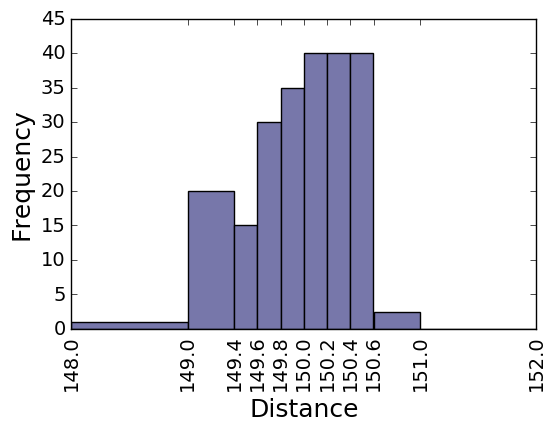

In [7]:
widths = boundaries[1:]-boundaries[:-1]
plt.bar(boundaries[:-1],frequency/widths,width=widths,color="#7777aa")
plt.xticks(boundaries,fontsize=14,rotation='vertical')
plt.yticks(fontsize=14)
plt.xlabel("Distance",fontsize=18)
plt.ylabel("Frequency",fontsize=18)

### Part F
Cumulative Frequency.

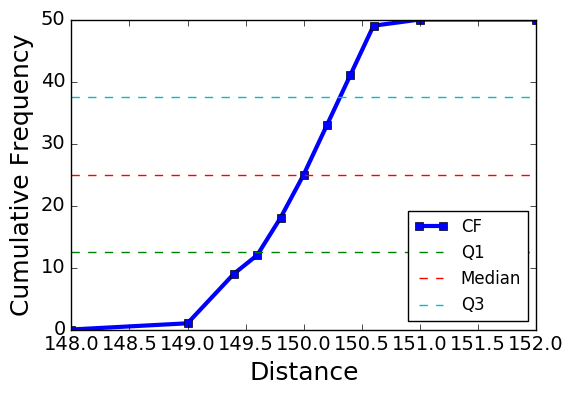

In [8]:
CF = np.cumsum(frequency)
CF.resize(len(CF)+1)
CF = np.roll(CF,1)
plt.plot(boundaries,CF,'-s',linewidth=3,label="CF")
plt.plot([148,152],0.25*sum(frequency)*np.ones(2),'--',label="Q1")
plt.plot([148,152],0.5*sum(frequency)*np.ones(2),'--',label="Median")
plt.plot([148,152],0.75*sum(frequency)*np.ones(2),'--',label="Q3")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Distance",fontsize=18)
plt.ylabel("Cumulative Frequency",fontsize=18)
plt.legend(loc='lower right')